In [2]:
# importing librarys 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [3]:
# reading in Raw data set 
df = pd.read_csv('May_2022_Exam_Data.csv')
df.head()

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,Audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,Audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,Audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,Audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


#### Dataset contains the following variables:
*	brand (manufacturer)
*	model (of car)
*	year (of registration of the car)
*	price (in GB pounds)
*	transmission (type of gearbox)
*	mileage (total distance covered by the car)
*	fuelType (type of fuel used by the car)
*	tax (annual cost of vehicle tax)
*	mpg (miles per gallon - a measure of fuel efficiency)
*	engineSize (size of the engine in litres)

In [5]:
# looking at data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59271 entries, 0 to 59270
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         59271 non-null  object 
 1   model         59271 non-null  object 
 2   year          59271 non-null  int64  
 3   price         59271 non-null  int64  
 4   transmission  59271 non-null  object 
 5   mileage       59271 non-null  int64  
 6   fuelType      59271 non-null  object 
 7   tax           59271 non-null  int64  
 8   mpg           59271 non-null  float64
 9   engineSize    59271 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 4.5+ MB


#### Data types of columns seem apropriate

In [6]:
# looking for missing values
df.isnull().sum() 

brand           0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

#### No missing values found

# <u>Filtering and Sampling data</u>


**I am interested in modelling the price of vehicles that have all of the following properties:**
*	Mileage less than 65000
*	Manual transmission
*	Petrol engine (fuelType)
*	Costing less than £175 in annual Vehicle Tax.


In [7]:
# Filtering data
filter_df = df.loc[(df['mileage'] < 65000) & 
               (df['transmission'] == 'Manual') & 
               (df['tax'] < 175) & 
               (df['fuelType'] == 'Petrol')]

In [10]:
filter_df.head()

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
2,Audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
4,Audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
8,Audi,A3,2015,10200,Manual,46112,Petrol,20,60.1,1.4
9,Audi,A1,2016,12000,Manual,22451,Petrol,30,55.4,1.4


In [11]:
df = filter_df

# removing redundant columns 
df.drop(columns=['fuelType','transmission'], inplace = True)

In [16]:
df.head()

,brand,model,year,price,mileage,tax,mpg,engineSize
0,Audi,A1,2017,12500,15735,150,55.4,1.4
2,Audi,A1,2016,11000,29946,30,55.4,1.4
4,Audi,A3,2019,17300,1998,145,49.6,1.0
8,Audi,A3,2015,10200,46112,20,60.1,1.4
9,Audi,A1,2016,12000,22451,30,55.4,1.4


### Random Sampling 2000 rows

In [17]:
import random
np.random.seed(16010572)

df = df.sample(n=2000, random_state=16010572, replace = False)
df.head()

,brand,model,year,price,mileage,tax,mpg,engineSize
57543,Toyota,Aygo,2018,7899,11411,145,69.0,1.0
55164,Toyota,Yaris,2018,10950,20312,145,47.1,1.5
31333,Ford,Fiesta,2015,7900,20690,0,65.7,1.0
27028,Ford,Focus,2017,10250,14950,145,61.4,1.0
38489,Ford,Fiesta,2017,10290,7824,145,65.7,1.0


# <u>Exploratory Data Analysis<u>

## Descriptive statistics

**What are Descriptive statistics ?**

Descriptive statistics are used to summarize the characteristics of a data set, they come in two main category, measures of central tendency and measures of dispersion. To estimate the averages of a data set measures of central tendency such as mean, median, and mode are used. Measures of dispersion highlight the spread in the data , measures of dispersion include standard deviation, variance, min and max , standard deviation is how far the data is spread about the mean and can be calculated by square rooting the variance, these descriptive statistics would be useful for this analysis because it would allow me to see the averages and range of specific variables e.g. price, it would also allow me to see which variables are continuous or categorical because categorical variables would have an odd values, finally it would allow me to spot if any variable may have outlines in them,  this would occur if their is a large difference between median and mean of a variable, For categorical variables, frequency tables can be used to determine how much each category contributes to the total.

In [25]:
# selecting numeric features
numeric = df[['price','mileage','tax','mpg','brand']]

In [21]:
# Descriptive stats for numeric
numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
price,2000.0,12161.34250,4666.652933,1795.0,8970.00,10999.0,14500.0,37500.0
mileage,2000.0,18097.60300,12965.453824,1.0,7937.25,15527.0,25641.5,64866.0
tax,2000.0,111.88250,56.743974,0.0,125.00,145.0,145.0,165.0
mpg,2000.0,56.70175,7.933899,20.8,52.30,57.7,62.8,69.0


In [22]:
# Descriptuve statistics grouped by brand 
numeric.groupby(['brand']).describe()

price                                                        \
           count          mean          std     min       25%      50%   
brand                                                                    
Audi       247.0  16448.931174  5001.319240  8298.0  12497.50  15990.0   
BMW         82.0  18023.524390  5129.380956  6998.0  14326.25  17838.5   
Ford      1245.0  11544.316466  3799.824750  1795.0   8990.00  10882.0   
Mercedes    52.0  18117.192308  4453.841255  9691.0  14999.75  17394.5   
Toyota     374.0   9270.326203  3051.244992  2795.0   7325.75   8985.0   

                            mileage                ...    tax            mpg  \
               75%      max   count          mean  ...    75%    max   count   
brand                                              ...                         
Audi      18985.00  32788.0   247.0  21549.607287  ...  145.0  165.0   247.0   
BMW       21859.50  32995.0    82.0  14078.560976  ...  145.0  160.0    82.0   
Ford      13499.00  37500.0  1245.0  17810.477912  ...  145.0  165.0  1245.0   
Mercedes  21762.25  29495.0    52.0  17904.307692  ...  145.0  160.0    52.0   
Toyota    10495.00  24995.0   374.0  17681.663102  ...  145.0  150.0   374.0   

                                                               
               mean       std   min     25%   50%   75%   max  
brand                                                          
Audi      53.236842  7.032374  38.2  49.600  53.3  57.6  67.3  
BMW       48.978049  5.144001  36.2  45.175  51.4  52.3  57.6  
Ford      57.462008  7.300670  20.8  54.300  58.9  64.2  65.7  
Mercedes  46.663462  7.000421  28.5  44.800  49.6  51.4  53.3  
Toyota    59.548396  8.328052  33.2  56.500  58.0  68.9  69.0  

[5 rows x 32 columns]

**What do the Descriptive statistics tell me?**

From the descriptive statistics i can see the mean price of a car is £12161, i can also see there is a big range in price of cars going from £1795 to £37500, the standard deviation in price indicates there is large variability in price. from looking at stats of the price and mileage variables i can see there is a quite a big difference between mean and median this could indicate potential outliers, however in the tax and mpg variables the standard deviation is quite low indicating less variability in these variables. Using the describeBy function i was able to get summary statistics by each brand, some notable points i can see are that Mercedes have the highest mean price and Toyota have the lowest mean price,i can also see standard deviation for audi and bmw are high indicating there is high variability in price with these cars.

## Univariate graphs 

#### What exploratory graphs would be appropriate for this dataset? 

The appropriate exploratory graph for this data set would be histograms , boxplots and scatter plots , Histograms can be used to illustrate the distribution of the continuous variables; for example, if a variable is normally distributed, the histogram will be bell shaped, histograms can also show if the distribution of the data is skewed, box plots are another way to see the spread of the data , a box plot will show the median , min max and IQR. box plots will also indicate outliers in a variable, an outlier is a data point which falls outside 1.5*IQR. a box plot can also show any possible skewness in a variable, box plots can be used to with a categorical variable on the x axis this can allow us to vissualy comapare variability between category for example a tighter boxplot would indicate less variability in data. finally a scatter plot can be used to show any linear relationships or correlation between continuous variables,

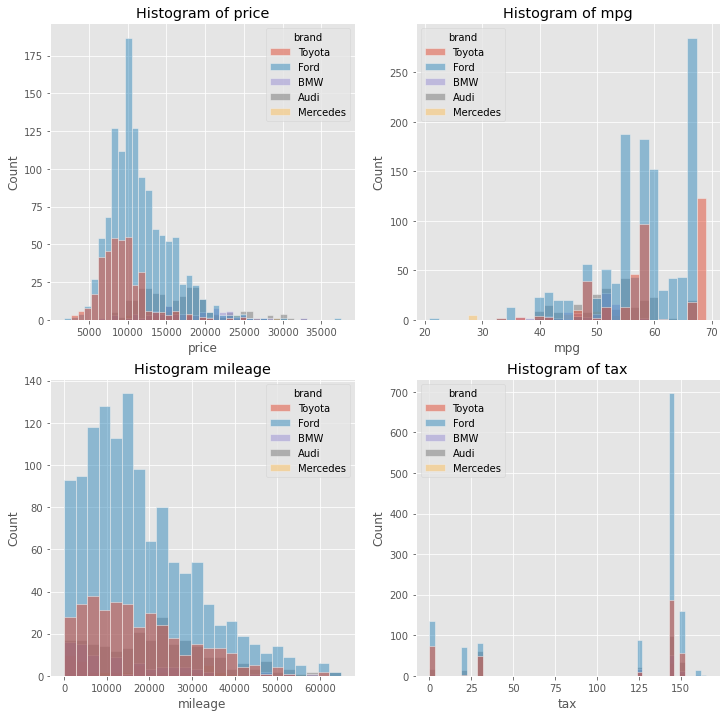

In [30]:
# histograms of all numeric features with brand as hue

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

# Plot the histograms on each subplot
sns.histplot(ax=axes[0, 0], x='price', data = df, hue = 'brand')
sns.histplot(ax=axes[0, 1], x ='mpg', data = df, hue = 'brand')
sns.histplot(ax=axes[1, 0], x ='mileage', data = df, hue = 'brand')
sns.histplot(ax=axes[1, 1], x = 'tax', data = df, hue = 'brand')

# Add titles and axis labels to each subplot
axes[0, 0].set(title='Histogram of price')
axes[0, 1].set(title='Histogram of mpg')
axes[1, 0].set(title='Histogram mileage')
axes[1, 1].set(title='Histogram of tax');

#### Insights?

* Histogram of price i can see that the price look normally distributed with a slight positive skew ,
* The histogram of mpg does not look normally distributed and has a negative skew.
* Looking at the histogram of mileage i can see it also has a positive skew.
* The histogram of tax looks very odd with most of values around 150 this indicates tax might not be a continuous variable,

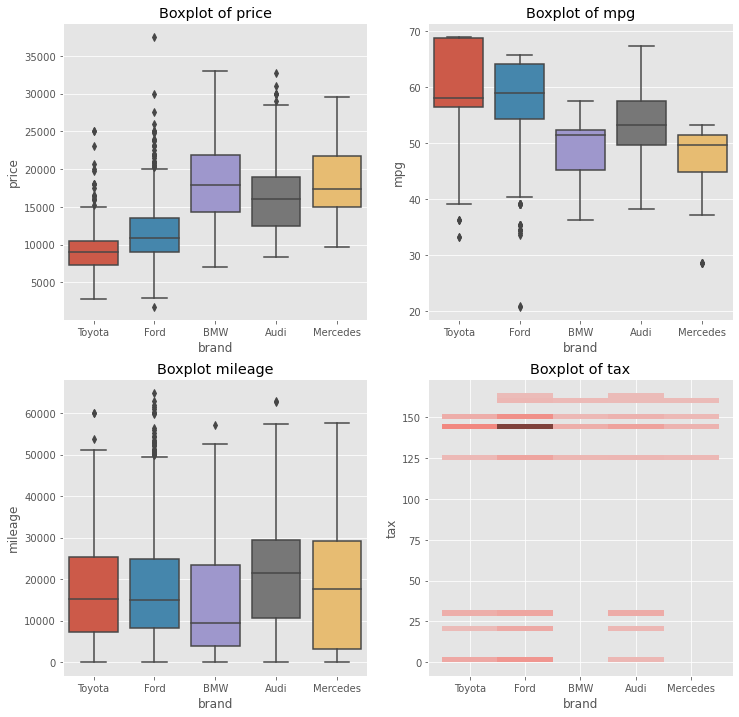

In [31]:
# grouped  box plots of numeric features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

# Plot the histograms on each subplot
sns.boxplot(ax=axes[0, 0],  x = 'brand', y ='price', data = df )
sns.boxplot(ax=axes[0, 1],  x = 'brand', y ='mpg', data = df )
sns.boxplot(ax=axes[1, 0], x = 'brand', y ='mileage', data = df )
sns.histplot(ax=axes[1, 1], x = 'brand', y ='tax', data = df)

# Add titles and axis labels to each subplot
axes[0, 0].set(title='Boxplot of price')
axes[0, 1].set(title='Boxplot of mpg')
axes[1, 0].set(title='Boxplot mileage')
axes[1, 1].set(title='Boxplot of tax');

#### Insights?

* Looking at the lengths boxplots for price i can find out information about the variability in price , in my sample i can see Toyota has the tightest box plot indicating the least variability in price. i can also see toyota has the lowest median price whereas Mercedes has the highest median price. This boxplot also shows me Toyota , ford and Audi have a number of outliers. 
* The  second group of box plot tells me info about the variability in mpg for different brands, i can see bmw is very negatively skewed and toyota is positively skewed.

##  Scatter graphs and correlation

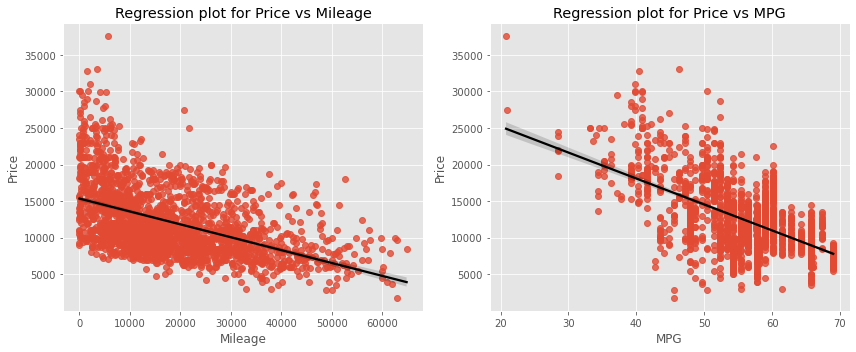

In [45]:
# scatter plot matrix with regression line 

# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# First subplot with price and mileage
sns.regplot(x="mileage", y="price", data=df, line_kws={'color':'black'}, ax=ax1)
ax1.set_xlabel("Mileage")
ax1.set_ylabel("Price")
ax1.set_title("Regression plot for Price vs Mileage")

# Second subplot with price and mpg
sns.regplot(x="mpg", y="price", data=df, line_kws={'color':'black'}, ax=ax2)
ax2.set_xlabel("MPG")
ax2.set_ylabel("Price")
ax2.set_title("Regression plot for Price vs MPG")

# Display the plot
plt.tight_layout()
plt.show()

#### Insights? 

* Looking at the scatter plots there appears to be a negative relationship between price and mpg 
* There also seems to be a negative relationship between price and mileage. 

## Corelation

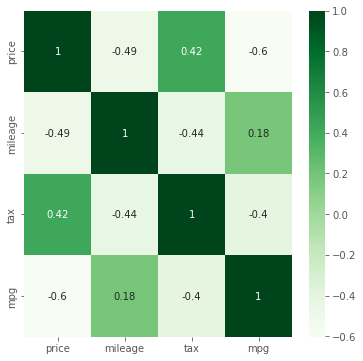

In [38]:
# correlartion matrix
plt.figure(figsize=(6,6))
sns.heatmap(numeric.corr(),cbar = True, annot= True,cmap = 'Greens'); 

In [52]:
# Calculate correlation coefficients and p-values
correlations = df[['price', 'mileage', 'mpg']].corr()['price'].sort_values(ascending=False)
p_values = [pearsonr(df[column], df['price'])[1] for column in correlations.index]

# Print correlation coefficients and p-values
for column, correlation, p_value in zip(correlations.index, correlations.values, p_values):
    print(f"{column}: correlation = {correlation:.3f}, p-value = {p_value:.3f}")

price: correlation = 1.000, p-value = 0.000
mileage: correlation = -0.489, p-value = 0.000
mpg: correlation = -0.603, p-value = 0.000


Using classification defined in Evans 1996 i can say: 
* There is a  moderate negative correlation with price and mileage (-0.49)
* There is a strong negative correlation with price and mpg (-0.60).
* From the p values i can see , all p values are < 0.05 meaning all the correlations are statistically significant

# Simple Linear regression

In [83]:
# slr using price and mpg 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

#### Creating a simple linear regression model using the variables price and MPG as it has the strogest corelation to it

In [65]:
# setting features matrix (x) and target variable (y)
X = df.drop(['price','brand','year','engineSize','model','mileage','tax'],axis =1) # features
y = df['price'] # target

X.shape,y.shape

((2000, 1), (2000,))

In [66]:
# train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9) # 80 / 20 split

X_train.shape, X_test.shape 

((1600, 1), (400, 1))

In [78]:
# set up model
linreg = LinearRegression()

# fit to training data
linreg.fit(X_train,y_train)

# make predictions using testing set
y_pred = linreg.predict(X_test)

# coeficients, intercept and R squared
print('reg.coef_: {}'.format(linreg.coef_))
print('reg.intercep_: {:.2f}'.format(linreg.intercept_))
print('R Squared Score is: {:.2f}' .format(r2_score(y_test, y_pred)))

reg.coef_: [-350.01067553]
reg.intercep_: 31939.06
R Squared Score is: 0.39


### Formula: 
$$Price = 31939 -350 \times MPG $$

* **From the formula we can say that when the MPG is 0 the price is £31939**
* **i can also say for every one unit increase in MPG price goes down by £350**
* **R squared value of 0.39 means 39% of variability in price can be explained by mpg.**
* **The remaining 61% of the variability is attributed to other factors not included in the model.**

# Multiple Linear regression

#### Creating a multiple linear regression model using the rest of the numeric featres

In [81]:
# setting features matrix (x) and target variable (y)
X = df[['mpg','mileage','tax']] # mlr so multiple features 

y = df['price'] # target

X.shape,y.shape 

((2000, 3), (2000,))

In [82]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9) # 80 /20 split

X_train.shape, X_test.shape 

((1600, 3), (400, 3))

In [87]:
# set up model
linreg = LinearRegression()

# fit to training data
linreg.fit(X_train, y_train)

# make predictions using testing data
y_pred = linreg.predict(X_test)

# coeficients, intercept and R squared
print('reg.coef_: {}'.format(linreg.coef_))
print('reg.intercep_: {:.2f}'.format(linreg.intercept_))
print('R Squared Score is: {:.2f}' .format(r2_score(y_test, y_pred)))

reg.coef_: [-2.98019596e+02 -1.35442071e-01  4.44534650e+00]
reg.intercep_: 30982.19
R Squared Score is: 0.50


### Formula $$Price = 30982.19 - 298\times mpg  -0.135 \times mileage + 4.4\times tax$$


Coefficients:

* For each unit increase in MPG, the price decreases by £298.02.
* For each unit increase in mileage, the price decreases by £0.135.
* For each unit increase in tax, the price increases by £4.45.


* Intercept: The intercept term is £30982.19, which represents the estimated price when all predictor variables (MPG, mileage, tax) are zero.


* R-squared value: The R-squared value of 0.50 indicates that approximately 50% of the variability in the price can be explained by the multiple linear regression model using MPG, mileage, and tax as predictor variables.

#  Random forest regression 

In [88]:
from sklearn.ensemble import RandomForestRegressor

# set up model
rf = RandomForestRegressor(n_estimators=100,random_state=35)

# fit to training data
rf.fit(X_train,y_train)

# predict using testing data
y_pred = rf.predict(X_test)

In [89]:
print('R Squared Score is:', r2_score(y_test, y_pred))

# training at testing score 
print('Training accuracy: {:.2f}'.format(rf.score(X_train,y_train)))
print('Test accuracy: {:.3f}'.format(rf.score(X_test,y_test)))

R Squared Score is: 0.7189421142762285
Training accuracy: 0.95
Test accuracy: 0.719


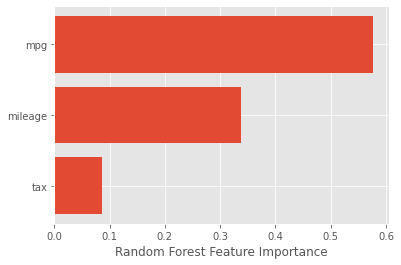

In [91]:
# ploting feature importance in order
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance");

* R-squared value: The R-squared value of 0.7189 indicates that approximately 71.89% of the variability in the target variable (price) can be explained by the random forest model. This means the model performs reasonably well in capturing the relationships between the predictor variables and the target variable.


* Training accuracy: The training accuracy of 0.95 suggests that the model achieved a high accuracy of 95% on the training data. This means the model fits well to the training data and can effectively predict the price based on the given features.


* Test accuracy: The test accuracy of 0.719 indicates that the model achieved an accuracy of 71.9% on the test data. This suggests that the model performs well on unseen data, as the test accuracy is close to the training accuracy.


* The feature importance graph shows that the most influential feature at predicting price is mpg 


* Overall, the random forest regressor model shows a strong ability to explain the variability in the price based on the given features, and it demonstrates good performance on both the training and test data.